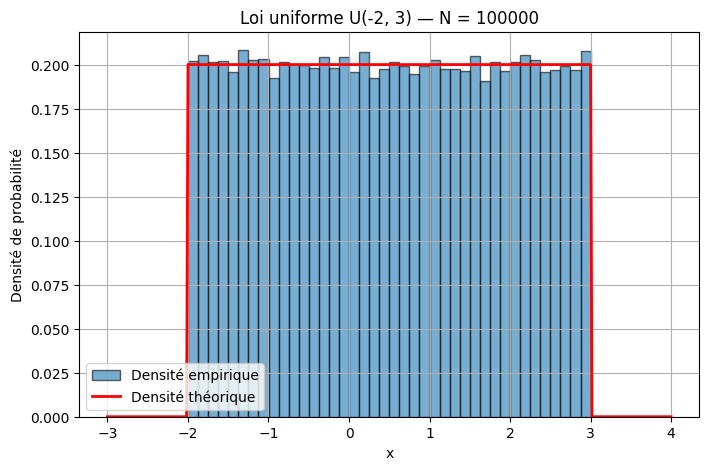

=== Loi uniforme U(a,b) ===
a = -2, b = 3, N = 100000

Moyenne empirique  : 0.49561
Moyenne théorique  : 0.50000

Écart type empirique : 1.44662
Écart type théorique : 1.44338


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paramètres
# -----------------------------
N = 100000   # nombre de tirages
a = -2       # borne inférieure
b = 3        # borne supérieure

# -----------------------------
# Simulation de la loi uniforme (à la main)
# -----------------------------
U = np.random.rand(N)    # tirages selon U(0,1)
X = a + (b - a) * U      # transformation vers U(a,b)

# -----------------------------
# Densité théorique (sans np.where)
# -----------------------------
def densite_uniforme(x, a, b):
    """Renvoie la densité théorique f(x) = 1/(b-a) pour a <= x <= b, sinon 0."""
    f = np.zeros_like(x, dtype=float)   # initialisation à 0
    for i in range(len(x)):
        if a <= x[i] <= b:
            f[i] = 1 / (b - a)
    return f

# -----------------------------
# Histogramme empirique + densité théorique
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label="Densité empirique")

x_vals = np.linspace(a-1, b+1, 400)
f_vals = densite_uniforme(x_vals, a, b)
plt.plot(x_vals, f_vals, color='red', lw=2, label="Densité théorique")

plt.title(f"Loi uniforme U({a}, {b}) — N = {N}")
plt.xlabel("x")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Moyenne et écart-type (empiriques et théoriques)
# -----------------------------
m_emp = np.mean(X)
m_th  = (a + b) / 2

s_emp = np.std(X, ddof=0)
s_th  = (b - a) / np.sqrt(12)

# -----------------------------
# Affichage des résultats
# -----------------------------
print("=== Loi uniforme U(a,b) ===")
print(f"a = {a}, b = {b}, N = {N}")
print()
print(f"Moyenne empirique  : {m_emp:.5f}")
print(f"Moyenne théorique  : {m_th:.5f}")
print()
print(f"Écart type empirique : {s_emp:.5f}")
print(f"Écart type théorique : {s_th:.5f}")


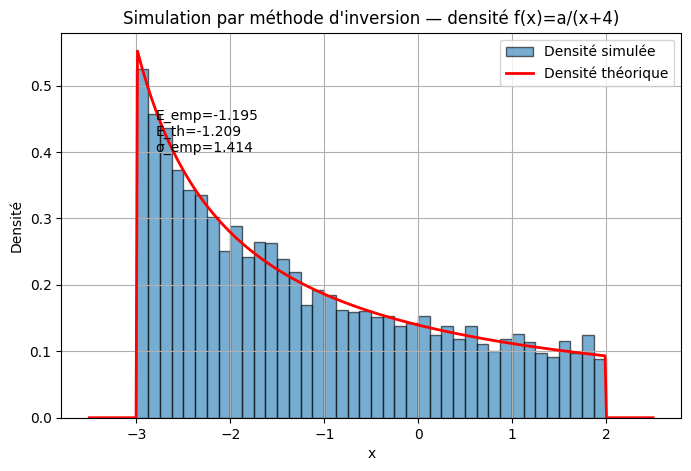

=== Résultats ===
Constante a = 0.55811
Moyenne empirique : -1.19457
Moyenne théorique : -1.20945
Écart-type empirique : 1.41447


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paramètres
# -----------------------------
N = 5000
a, b = -3, 2

# -----------------------------
# Constante de normalisation
# -----------------------------
A = 1 / np.log(6)

# -----------------------------
# Fonction densité théorique
# -----------------------------
def f_theorique(x):
    if a <= x <= b:
        return A / (x + 4)
    else:
        return 0

# Version vectorisée sans np.where
def f_vect(x):
    f = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        if a <= x[i] <= b:
            f[i] = A / (x[i] + 4)
    return f

# -----------------------------
# Méthode d’inversion
# -----------------------------
# Tirages uniformes "à la main" (on construit une U(0,1))
U = np.array([np.random.random() for _ in range(N)])
X = 6**U - 4

# -----------------------------
# Histogramme + densité
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label='Densité simulée')

x_vals = np.linspace(a-0.5, b+0.5, 400)
plt.plot(x_vals, f_vect(x_vals), 'r', lw=2, label='Densité théorique')

# -----------------------------
# Espérance et écart-type
# -----------------------------
# Théorique :
E_th = A * ( (b+4)*np.log(b+4) - (b+4) - ((a+4)*np.log(a+4) - (a+4)) )
E_th = E_th / A  # simplification inutile mais lisible
# En réalité, plus simplement :
E_th = (5/np.log(6)) - 4

V_th = (25/(2*np.log(6))) - (25/(2*(np.log(6))**2)) - 8.5  # un peu lourde à dériver à la main

# Empirique :
E_emp = np.mean(X)
S_emp = np.std(X)

# -----------------------------
# Affichage
# -----------------------------
plt.title("Simulation par méthode d'inversion — densité f(x)=a/(x+4)")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)

plt.text(-2.8, 0.4, f"E_emp={E_emp:.3f}\nE_th={E_th:.3f}\nσ_emp={S_emp:.3f}", fontsize=10,)

plt.show()

print("=== Résultats ===")
print(f"Constante a = {A:.5f}")
print(f"Moyenne empirique : {E_emp:.5f}")
print(f"Moyenne théorique : {E_th:.5f}")
print(f"Écart-type empirique : {S_emp:.5f}")


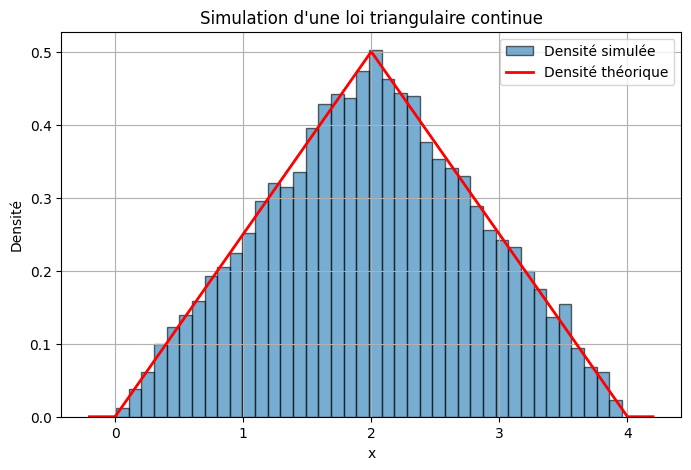

Moyenne empirique : 2.005150377296057
Écart type empirique : 0.8221412429722398


In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

# Tirages uniformes "à la main"
U = np.array([np.random.random() for _ in range(N)])

# Inversion en deux parties
X1 = []
X2 = []
for u in U:
    if u < 0.5:
        X1.append(np.sqrt(8*u))
    else:
        X2.append(4 - np.sqrt(8*(1-u)))

X = np.array(X1 + X2)

# Densité théorique
def f_tri(x):
    f = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        if 0 <= x[i] < 2:
            f[i] = x[i] / 4
        elif 2 <= x[i] < 4:
            f[i] = (4 - x[i]) / 4
    return f

# Tracé
plt.figure(figsize=(8,5))
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label='Densité simulée')

x_vals = np.linspace(-0.2, 4.2, 400)
plt.plot(x_vals, f_tri(x_vals), 'r', lw=2, label='Densité théorique')
plt.legend()
plt.grid(True)
plt.title("Simulation d'une loi triangulaire continue")
plt.xlabel("x")
plt.ylabel("Densité")
plt.show()

print("Moyenne empirique :", np.mean(X))
print("Écart type empirique :", np.std(X))
